In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Prepare a toy dataset

In [15]:
## Dataset

data = np.genfromtxt('perceptron_toydata.txt', delimiter='\t')
X, y = data[:,:2], data[:,2]
y = y.astype(np.int)

print('Class label countr:', np.bincount(y))
print('X.shape', X.shape)
print('y.shape', y.shape)

Class label countr: [50 50]
X.shape (100, 2)
y.shape (100,)


In [16]:
# Shuffling & train/test split
shuffle_idx = np.arange(y.shape[0])
shuffle_rng = np.random.RandomState(123)
shuffle_rng.shuffle(shuffle_idx)
X, y = X[shuffle_idx], y[shuffle_idx]

X_train, X_test = X[shuffle_idx[:70]], X[shuffle_idx[70:]]
y_train, y_test = y[shuffle_idx[:70]], y[shuffle_idx[70:]]

In [17]:
# Normalize
mu, sigma = X_train.mean(axis=0), X_train.std(axis=0)
X_train = (X_train - mu)/sigma
X_test = (X_test - mu)/sigma

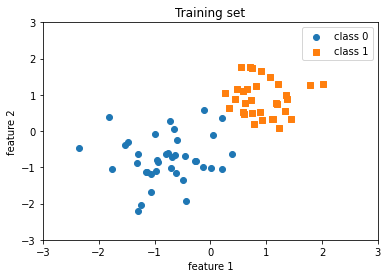

In [21]:
plt.scatter(X_train[y_train==0,0], X_train[y_train==0,1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1,0], X_train[y_train==1,1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

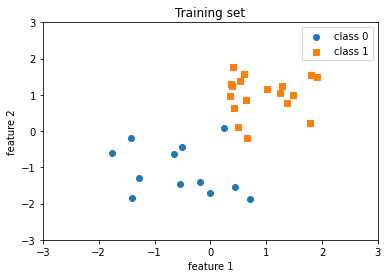

In [23]:
plt.scatter(X_test[y_test==0,0], X_test[y_test==0,1], label='class 0', marker='o')
plt.scatter(X_test[y_test==1,0], X_test[y_test==1,1], label='class 1', marker='s')
plt.title('Training set')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend()
plt.show()

## Define the Perceptron model

In [33]:
class Perceptron():
    def __init__(self, num_features):
        self.num_features = num_features
        self.weights = np.zeros((num_features, 1), dtype=np.float)
        self.bias = np.zeros(1, dtype=np.float)
        
    def forward(self, x):
        linear = np.dot(x, self.weights) + self.bias
        prediction = np.where(linear > 0., 1, 0)
        return prediction
        
    def backward(self, x, y):
        prediction = self.forward(x)
        errors = y - prediction
        return errors
        
    def train(self, x, y, epochs):
        for e in range(epochs):
            
            for i in range(y.shape[0]):
                errors = self.backward(x[i].reshape(1, self.num_features), y[i]).reshape(-1)
                self.weights += (errors * x[i]).reshape(self.num_features, 1)
                self.bias += errors
        
    def evaluate(self, x, y):
        predictions = self.forward(x).reshape(-1)
        accuracy = np.sum(predictions == y) / y.shape[0]
        return accuracy
        

## Training the perceptron

In [34]:
ppn = Perceptron(num_features=2)

ppn.train(X_train, y_train, epochs=5)

print('Model prarameters:\n\n')
print(' Weights: %s\n' % ppn.weights)
print(' Biases: %s\n' %ppn.bias)

Model prarameters:


 Weights: [[1.27340847]
 [1.34642288]]

 Biases: [-1.]



## Evaluation

In [35]:
test_acc = ppn.evaluate(X_test, y_test)
print('Test set accuracy: %.2f%%' % (test_acc*100))

Test set accuracy: 93.33%


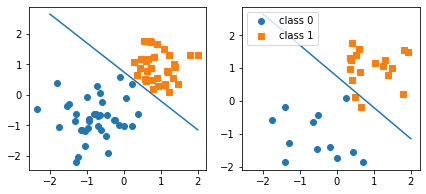

In [36]:
# Decision Boundary

w, b = ppn.weights, ppn.bias

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()